# FACE DETECTION

In [1]:
# Face detection using mtcnn(Multi Task cascade Convolutional Neural Networks) which is a pre-trained model
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
import cv2
import logging, os
logging.disable(logging.WARNING)

In [2]:
# loading image
image = cv2.imread('bill_gates.jpg')
# cvtColor used to convert an image from one color to another color 
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# initializing MTCNN() object to detector variable
detector = MTCNN()
#  .detect_faces used to detect faces in the image
faces = detector.detect_faces(image)

In [3]:
from matplotlib.patches import Rectangle
def show_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    # get the current axis using .gca()
    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

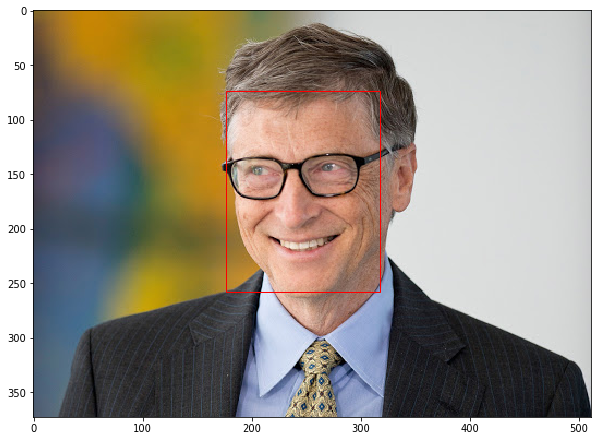

In [4]:
show_faces('bill_gates.jpg', faces)

# FACE RECOGNITION

In [5]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [6]:
# Load the known images
image=cv2.imread('bill_gates.jpg')
image1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('satya_nadella.jpg')
image2=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('tony.jpg')
image3=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [7]:
# get the face encodings for each person for comaparing with unknown images
image1_encoding=face_recognition.face_encodings(image1)[0] # a image can contain multiple faces but here we are interested in comparing the unknown faces with a single face of known image that is why we use [0] indexing 
image2_encoding=face_recognition.face_encodings(image2)[0]
image3_encoding=face_recognition.face_encodings(image3)[0]
# creating a database of known faces by storing in a list
known_face_encodings=[image1_encoding,image2_encoding,image3_encoding]

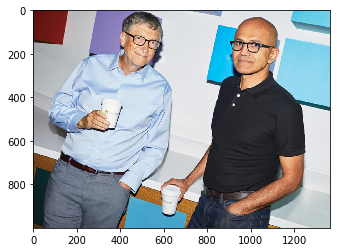

In [8]:
# load the image we want to check
image=cv2.imread('bill_satya.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
# Get face encodings for unknown faces from the picture
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [9]:
# Find if there are any known faces in the unknown image
from scipy.spatial import distance
#test if the unknown face matches any of the three people we know
#compute eucledian distance for getting similarities between the known and unknown faces

for unknown_face_encoding in unknown_face_encodings: # iterating over unknown faces 
    
    results=[]
    for known_face_encoding in known_face_encodings: # iterating over known faces
        d=distance.euclidean(known_face_encoding,unknown_face_encoding)  # applying euclidean distance for measuring similarity
        results.append(d)
        
    threshold=0.6  # fixing a threshold value for similarity
    results=np.array(results)<=threshold
    name="Unknown"
    if results[0]:
        name="Bill Gates"
    elif results[1]:
        name="Satya Nadella"
    elif results[2]:
        name="Tony Stark"
    print(f"Found {name} in the photo!")

Found Satya Nadella in the photo!
Found Bill Gates in the photo!


# IDENTIFY FACES WITH NAMES

In [10]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
from PIL import Image,ImageDraw,ImageFont
import cv2
%matplotlib inline

In [11]:
# Load images
image1=face_recognition.load_image_file('bill_gates.jpg')
image2=face_recognition.load_image_file('satya_nadella.jpg')
image3=face_recognition.load_image_file('tony.jpg')

In [12]:
# computing encodings for known faces
image1_encodings=face_recognition.face_encodings(image1)[0]
image2_encodings=face_recognition.face_encodings(image2)[0]
image3_encodings=face_recognition.face_encodings(image3)[0]
known_faces_encodings=[image1_encodings,image2_encodings,image3_encodings]
known_face_names=["Bill Gates","Satya Nadella","Tony Stark"]

In [22]:
# computing encodings for unknown faces
unknown_image=face_recognition.load_image_file('bill_satya.jpg')
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [23]:
# Find faces in the unknown_image with their name 
# find locations of faces identified in unknown_image
unknown_face_locations=face_recognition.face_locations(unknown_image)

#Convert to PIL(python imaging library) format
pil_img=Image.fromarray(unknown_image)

#Create a image draw instance
draw=ImageDraw.Draw(pil_img)

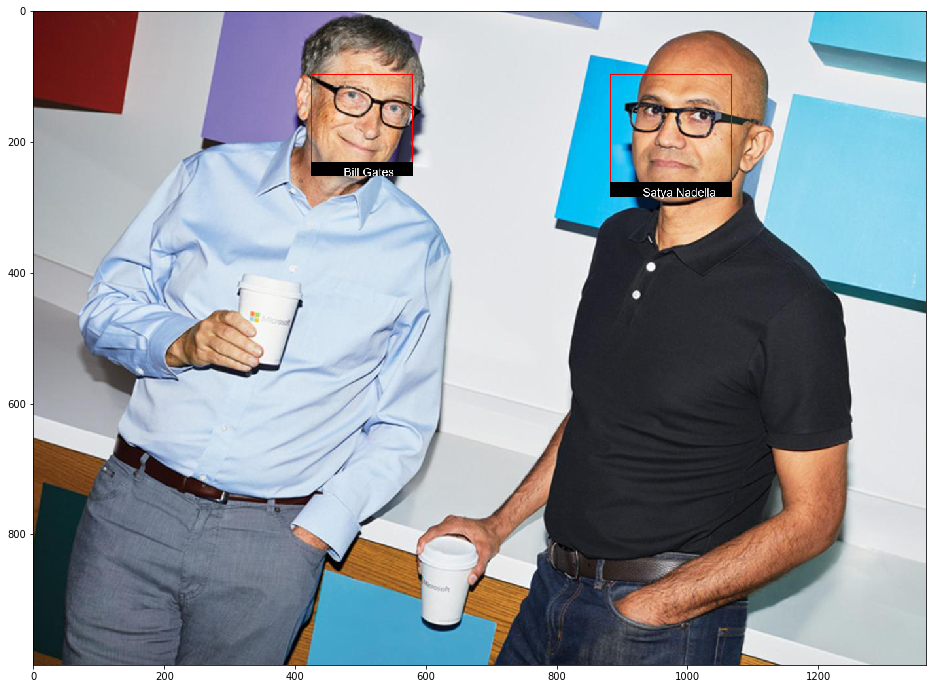

In [24]:
# loop through the faces in the unknown image
for (top,right,bottom,left), unknown_face_encoding in zip(unknown_face_locations,unknown_face_encodings):
    # Matching the known and unknown face encodings
    matches=face_recognition.compare_faces(known_faces_encodings,unknown_face_encoding)
    name="Unknown Person"
    # If there is a match
    if True in matches:
        match_index=matches.index(True)
        name=known_face_names[match_index]
        
    # Draw Box
    draw.rectangle(((left,top),(right,bottom)),outline=(255,0,0))
    
    # Draw label
    text_width,text_height=draw.textsize(name)
    draw.rectangle(((left,bottom-text_height-10),(right,bottom)),fill=(0,0,0),outline=(0,0,0))
    font = ImageFont.truetype("arial.ttf", 18)
    draw.text((left+50,bottom-text_height-5),name,fill=(255,255,255,255),font=font)
# delete the draw instance recommended as per doumentation
del draw
# image will be displayed with their names 
#pil_img.show()
plt.figure(figsize=(16,16))
plt.imshow(pil_img)

# FACIAL LANDMARKS

In [19]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [20]:
image=cv2.imread('bill_satya.jpg')
image_fun=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# finding landmarks on faces for eyebrows,lips,nose,.. e.t.c
face_landmarks_list=face_recognition.face_landmarks(image_fun)

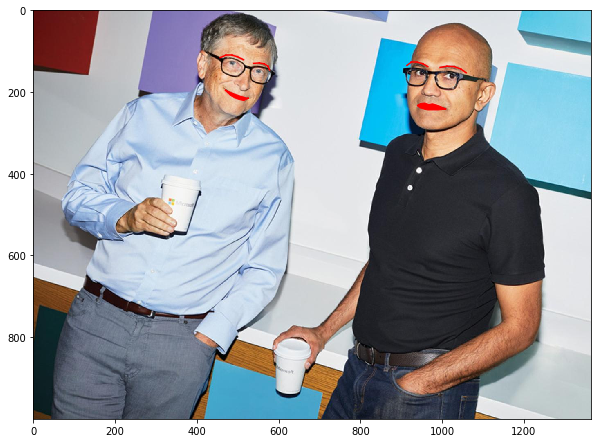

In [21]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.figure(figsize=(10,10))
plt.imshow(image_fun)
# get current axis using .gca()
ax=plt.gca()
for face_landmarks in face_landmarks_list:  # iterating over facial landmarks which we computed earlier
    left_eyebrow_pts=face_landmarks['left_eyebrow']  # here storing values of left eyebrow landmarks in a list
    prev_x,prev_y=left_eyebrow_pts[0] 
    for (x,y) in left_eyebrow_pts[1:]:   # iterating over the left eye brow landmark values 
        l=mlines.Line2D([prev_x,x],[prev_y,y],color="red")  # drawing a line between (x,y) & (previous x and previos y) so that we can able to see the line drawn on eyebrow
        ax.add_line(l)
        prev_x,prev_y=x,y
    right_eyebrow_pts=face_landmarks['right_eyebrow']
    prev_x,prev_y=right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:   # same process as computed to the left eyebrow is done here
        l=mlines.Line2D([prev_x,x],[prev_y,y],color="red")
        ax.add_line(l)
        prev_x,prev_y=x,y
    p=Polygon(face_landmarks['top_lip'],facecolor='red',edgecolor='red') # Polygon used to draw polygon shapes and selected top_lip to be drawn with red color
    ax.add_patch(p)
    p=Polygon(face_landmarks['bottom_lip'],facecolor='red',edgecolor='red') # selected bottom_lip to drawn with red color
    ax.add_patch(p)
    
plt.show()